In [51]:
import random
import copy
import logging
import sys

# from run_tests_201204 import *

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns

script_n = 'plot_210623_dim_redundant'

data_script = 'batch_210622_redundancy_dimensionality'
db_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/' \
            f'{data_script}/'


scaled_noise = 0
core_noise = 0
n_mfs = 488
n_grcs = 1459


pattern_type = 'binary'
db = {}

# for redundancy in [2.0, 3.0, 4.0, 8.0, 12.0, 16.0, 24.0, 32.0, 48.0, 64.0]:
#     model = f'local_random_redundant_{redundancy}_nshare_2'
#     model_name = f'local_random_{redundancy}'
#     print(model_name)
#     db[model_name] = compress_pickle.load(
#         db_path+f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_0.3_512_40.gz')

db = defaultdict(dict)
for redundancy in [2.0, 3.0, 4.0, 8.0, 12.0, 16.0, 24.0, 32.0, 48.0, 64.0]:
    model = f'local_random_redundant_{redundancy}_nshare_2'
    model_name = f'local_random'
#     print(model_name)
    db[model_name][redundancy] = compress_pickle.load(
        db_path+f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_0.3_512_40.gz')

model = f'local_random'
db[model_name][1.0] = compress_pickle.load(
    db_path+f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_0.3_512_40.gz')
# avg_grc_dim_list = defaultdict(list)
# for ress in db['random']:
#     ress_tries = ress
#     for ress in ress_tries:
# #         print(ress)
#         for noise in ress:
#             res = ress[noise]
#             grc_dim = res['grc_dim']
#             avg_grc_dim_list[noise].append(grc_dim)

# avg_grc_dim = {}
# for noise in avg_grc_dim_list:
#     avg_grc_dim[noise] = sum(avg_grc_dim_list[noise])/len(avg_grc_dim_list[noise])

In [37]:

name_map = {
        'scaleup4': "Observed",
        'global_random': "Global Random",
        'random': "Global Random",
#         'naive_random_17': "Local Random",
        'local_random': "Local Random",
}

palette = {
    name_map['scaleup4']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['random']: sns.color_palette()[1],
    name_map['local_random']: sns.color_palette()[2],
#     name_map['naive_random_21']: sns.color_palette()[2],
}


mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
#         'local_random_2.0',
#         'local_random_3.0',
        'local_random_4.0',
        'local_random_8.0',
        'local_random_12.0',
        'local_random_16.0',
#         'local_random_24.0',
#         'local_random_32.0',
#         'naive_random_17',
#         'naive_random4',
#         'random',
#         'scaleup4',
        ]:
    ress = db[model_name]
#     print(ress)
    ress_tries = ress[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
        noise = 1
#         for noise in ress:
    #         print(noise)
        res = ress[noise]
#             res_ref = ress_ref[noise]
#             res_ref2 = ress_ref2[noise]
#         hamming_distance_norm = res['hamming_distance']/res['num_grcs']
        mpd.add_data_point(
            model=model_name,
            noise=noise*100,
#                 grc_pcts=noise*100*2400/1200,
            grc_dim=res['grc_dim'],
#                 grc_dim_norm=res['grc_dim']/res_ref2['grc_dim'],
#                 grc_dim_norm2=res['grc_dim']/avg_grc_dim[noise],
            grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
#                 grc_by_mf_dim_ref=res['grc_dim']/res_ref['mf_dim'],
            num_grcs=res['num_grcs'],
            num_mfs=res['num_mfs'],
            voi=res['voi'],
            grc_pop_corr=res['grc_pop_corr'],
#                 grc_pop_corr_norm=res['grc_pop_corr']/res_ref2['grc_pop_corr'],
            binary_similarity=res['binary_similarity'],
            hamming_distance=res['hamming_distance'],
            normalized_mse=res['normalized_mse'],
            )


In [43]:
db[model_name].keys()

dict_keys([2.0, 3.0, 4.0, 8.0, 12.0, 16.0, 24.0, 32.0, 48.0, 64.0])

In [69]:

name_map = {
        'scaleup4': "Observed",
        'global_random': "Global Random",
        'random': "Global Random",
#         'naive_random_17': "Local Random",
        'local_random': "Local Random",
}

palette = {
    name_map['scaleup4']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['random']: sns.color_palette()[1],
    name_map['local_random']: sns.color_palette()[2],
#     name_map['naive_random_21']: sns.color_palette()[2],
}

# redundancies = [1.0, 3.0, 8.0, 12.0, 16.0, 24.0, 32.0, 48.0, 64.0]

mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
#         'local_random_2.0',
#         'local_random_3.0',
        'local_random',
#         'local_random_4.0',
#         'local_random_8.0',
#         'local_random_12.0',
#         'local_random_16.0',
#         'local_random_24.0',
#         'local_random_32.0',
#         'naive_random_17',
#         'naive_random4',
#         'random',
#         'scaleup4',
        ]:
    resss = db[model_name]
    for redundancy in resss:
        if redundancy > 32:
            continue
#     for redundancy in redundancies:
    #     print(ress)
        ress_tries = resss[redundancy][0]  # get the first element in tuple
    #     ress = ress[0]  # get the first try
        for n_try, ress in enumerate(ress_tries):
    #         print(resss_ref2[0])
    #         print(resss_ref2.keys())
    #         if n_try >= len(resss_ref2):
    #             print(n_try)
    #             continue
    #         ress_ref2 = resss_ref2[n_try]
            noise = 1
    #         for noise in ress:
        #         print(noise)
            res = ress[noise]
    #             res_ref = ress_ref[noise]
    #             res_ref2 = ress_ref2[noise]
    #         hamming_distance_norm = res['hamming_distance']/res['num_grcs']
            mpd.add_data_point(
                model=model_name,
                noise=noise*100,
                redundancy=redundancy,
    #                 grc_pcts=noise*100*2400/1200,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/85,
    #                 grc_dim_norm2=res['grc_dim']/avg_grc_dim[noise],
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
    #                 grc_by_mf_dim_ref=res['grc_dim']/res_ref['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
    #                 grc_pop_corr_norm=res['grc_pop_corr']/res_ref2['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

Height: 3.7593984962406015, Aspect: 1.33


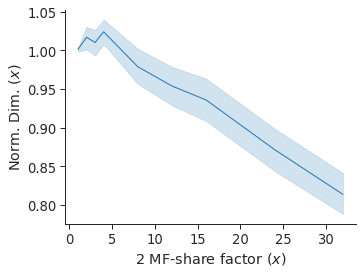

In [72]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='redundancy',
    y='grc_dim_norm',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
#     ylim=[0, None],
    y_axis_label='Norm. Dim. ($x$)',
    x_axis_label='2 MF-share factor ($x$)',
#     title='noise',
    legend=None,
    save_filename=f'{script_n}_1046.svg',
    show=True,
    )


Height: 3.7593984962406015, Aspect: 1.33


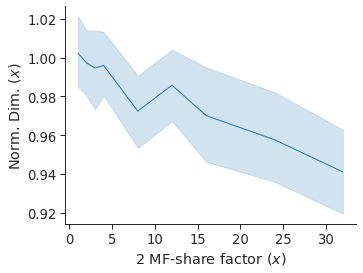

In [80]:

name_map = {
        'scaleup4': "Observed",
        'global_random': "Global Random",
        'random': "Global Random",
#         'naive_random_17': "Local Random",
        'local_random': "Local Random",
}

palette = {
    name_map['scaleup4']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['random']: sns.color_palette()[1],
    name_map['local_random']: sns.color_palette()[2],
#     name_map['naive_random_21']: sns.color_palette()[2],
}

# redundancies = [1.0, 3.0, 8.0, 12.0, 16.0, 24.0, 32.0, 48.0, 64.0]

mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
#         'local_random_2.0',
#         'local_random_3.0',
        'local_random',
#         'local_random_4.0',
#         'local_random_8.0',
#         'local_random_12.0',
#         'local_random_16.0',
#         'local_random_24.0',
#         'local_random_32.0',
#         'naive_random_17',
#         'naive_random4',
#         'random',
#         'scaleup4',
        ]:
    resss = db[model_name]
    for redundancy in resss:
        if redundancy > 32:
            continue
#     for redundancy in redundancies:
    #     print(ress)
        ress_tries = resss[redundancy][0]  # get the first element in tuple
    #     ress = ress[0]  # get the first try
        for n_try, ress in enumerate(ress_tries):
    #         print(resss_ref2[0])
    #         print(resss_ref2.keys())
    #         if n_try >= len(resss_ref2):
    #             print(n_try)
    #             continue
    #         ress_ref2 = resss_ref2[n_try]
            noise = .5
    #         for noise in ress:
        #         print(noise)
            res = ress[noise]
    #             res_ref = ress_ref[noise]
    #             res_ref2 = ress_ref2[noise]
    #         hamming_distance_norm = res['hamming_distance']/res['num_grcs']
            mpd.add_data_point(
                model=model_name,
                noise=noise*100,
                redundancy=redundancy,
    #                 grc_pcts=noise*100*2400/1200,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/15.4,
    #                 grc_dim_norm2=res['grc_dim']/avg_grc_dim[noise],
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
    #                 grc_by_mf_dim_ref=res['grc_dim']/res_ref['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
    #                 grc_pop_corr_norm=res['grc_pop_corr']/res_ref2['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='redundancy',
    y='grc_dim_norm',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
#     ylim=[0, None],
    y_axis_label='Norm. Dim. ($x$)',
    x_axis_label='2 MF-share factor ($x$)',
#     title='noise',
    legend=None,
    save_filename=f'{script_n}_{noise}.svg',
    show=True,
    )


Height: 3.7593984962406015, Aspect: 1.33


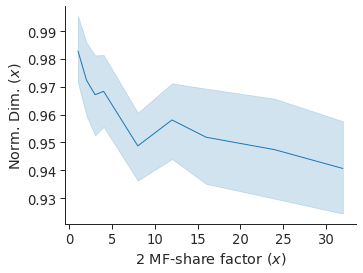

In [86]:

name_map = {
        'scaleup4': "Observed",
        'global_random': "Global Random",
        'random': "Global Random",
#         'naive_random_17': "Local Random",
        'local_random': "Local Random",
}

palette = {
    name_map['scaleup4']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['random']: sns.color_palette()[1],
    name_map['local_random']: sns.color_palette()[2],
#     name_map['naive_random_21']: sns.color_palette()[2],
}

# redundancies = [1.0, 3.0, 8.0, 12.0, 16.0, 24.0, 32.0, 48.0, 64.0]

mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
#         'local_random_2.0',
#         'local_random_3.0',
        'local_random',
#         'local_random_4.0',
#         'local_random_8.0',
#         'local_random_12.0',
#         'local_random_16.0',
#         'local_random_24.0',
#         'local_random_32.0',
#         'naive_random_17',
#         'naive_random4',
#         'random',
#         'scaleup4',
        ]:
    resss = db[model_name]
    for redundancy in resss:
        if redundancy > 32:
            continue
#     for redundancy in redundancies:
    #     print(ress)
        ress_tries = resss[redundancy][0]  # get the first element in tuple
    #     ress = ress[0]  # get the first try
        for n_try, ress in enumerate(ress_tries):
    #         print(resss_ref2[0])
    #         print(resss_ref2.keys())
    #         if n_try >= len(resss_ref2):
    #             print(n_try)
    #             continue
    #         ress_ref2 = resss_ref2[n_try]
            noise = .3
    #         for noise in ress:
        #         print(noise)
            res = ress[noise]
    #             res_ref = ress_ref[noise]
    #             res_ref2 = ress_ref2[noise]
    #         hamming_distance_norm = res['hamming_distance']/res['num_grcs']
            mpd.add_data_point(
                model=model_name,
                noise=noise*100,
                redundancy=redundancy,
    #                 grc_pcts=noise*100*2400/1200,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/5.5,
    #                 grc_dim_norm2=res['grc_dim']/avg_grc_dim[noise],
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
    #                 grc_by_mf_dim_ref=res['grc_dim']/res_ref['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
    #                 grc_pop_corr_norm=res['grc_pop_corr']/res_ref2['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='redundancy',
    y='grc_dim_norm',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
#     ylim=[0, None],
    y_axis_label='Norm. Dim. ($x$)',
    x_axis_label='2 MF-share factor ($x$)',
#     title='noise',
    legend=None,
    save_filename=f'{script_n}_{noise}.svg',
    show=True,
    )
